In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
# tf.keras.models.Sequential()
'''
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
'''
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
# relu: y = max(0, x)
# softmax: 将向量变成概率分布。
# x = [x1, x2, x3]
# y = [e^x1/sum, e^x2/sum, e^x3/sum],   sum = e^x1 + e^x2 + e^x3

# reason for sparse:
# 若y是index(一维index值)，则用sparse转为向量    sparse_categorical_crossentropy
# 若y是one_hot(即y已经是向量)，则不需要sparse    categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [5]:
# 归一化 x = (x - u) / std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [7]:
# TensorBoard, EarlyStopping, ModelCheckpoint
logdir = "./graph_def_and_weights"
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True, save_weights_only=False)
]
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid), callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 163us/sample - loss: 0.5339 - accuracy: 0.8127 - val_loss: 0.4110 - val_accuracy: 0.8586
Epoch 2/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3900 - accuracy: 0.8608 - val_loss: 0.3705 - val_accuracy: 0.8672
Epoch 3/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.3529 - accuracy: 0.8735 - val_loss: 0.3628 - val_accuracy: 0.8690
Epoch 4/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.3286 - accuracy: 0.8813 - val_loss: 0.3373 - val_accuracy: 0.8780
Epoch 5/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.3099 - accuracy: 0.8862 - val_loss: 0.3317 - val_accuracy: 0.8812
Epoch 6/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2938 - accuracy: 0.8933 - val_loss: 0.3171 - val_accuracy: 0.8862
Epoch 7/10
55000/55000 [==============================] 

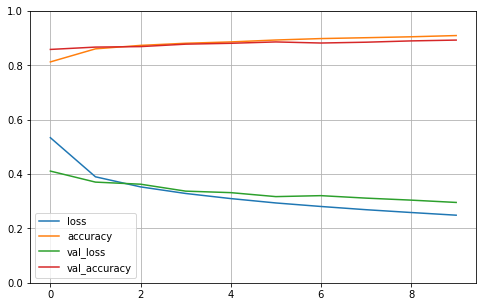

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8, 5])
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3373 - accuracy: 0.8791


[0.33731333055496215, 0.8791]

In [ ]:
loaded_model = keras.models.load_model(output_model_file)
loaded_model.evaluate(x_test_scaled, y_test)

In [ ]:
model.save_weights(os.path.join(logdir, "fashion_mnist_weights_2.h5"))